## Black Friday Dataset EDA and Feature Engineering - Cleaning and preparing the dataset for model training


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\meenata\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\meenata\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Import the dataset

df_train = pd.read_csv('C:/Users/meenata/Desktop/Data Analysis - EDA, Feature Engineering, Statistical Analysis/Black Friday Sales/Black Friday dataset/train.csv')
df_test = pd.read_csv('C:/Users/meenata/Desktop/Data Analysis - EDA, Feature Engineering, Statistical Analysis/Black Friday Sales/Black Friday dataset/test.csv')

In [3]:
# Append train and test dataset

df = pd.concat([df_train, df_test])

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping unnecessary columns from the dataset

In [5]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [6]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Dealing with categorical features - Gender, Age, City

In [7]:
# Handling categorical variable - Gender
 
df['Gender'] = df['Gender'].map({'F':0,'M':1}) # or df['Gender'] = pd.get_dummies(['Gender'],drop_first=1)

In [8]:
# Handling categorical variable - Age

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [10]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
# Handling categorical variable - City

df['City_Category'].unique()
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [12]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [13]:
df = pd.concat([df,df_city],axis=1)

In [14]:
df.drop('City_Category',axis=1, inplace=True)

In [15]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


### Handling missing values

In [16]:
## Missing values

df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Here, the missing values are present in Product_Category_2 and Product_Category_3 features. Purchase column is not considered because the null values represent test data

### Replace missing values of categorical features with mode 

In [17]:
## Replacing missing values - Product_Category_2 and Product_Category_3

df['Product_Category_2'].unique() # Discrete feature 

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
# For Product_Category_2

df['Product_Category_2'].mode()[0]

8.0

In [19]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [20]:
# For Product_Category_3

In [21]:
df['Product_Category_3'].unique() # Discrete feature 

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [22]:
df['Product_Category_3'].mode()[0]

16.0

In [23]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

### Datatype conversion

In [24]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [26]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,1,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [27]:
# Converting object into integers

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  bool   
 10  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int32(1), int64(5)
memory usage: 58.3 MB


In [29]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [30]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


## Visualisation

C:\Users\meenata\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

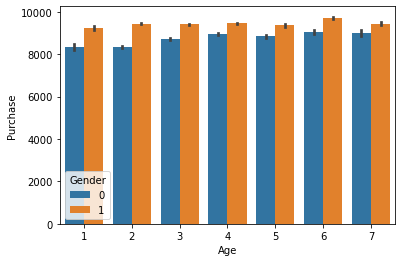

In [31]:
## Visualisation of Age vs Purchase

sns.barplot('Age','Purchase',hue='Gender',data=df)

## Observation

1. Percentage of Purchase is more among Male when compared to Female.
2. Distribution of purchase based on age seems uniform

C:\Users\meenata\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

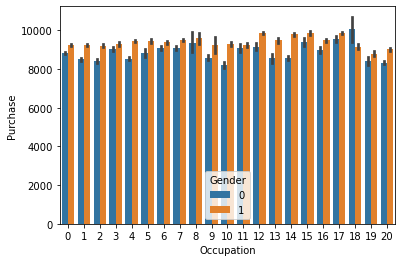

In [32]:
## Visualisation of Purchase with Occupation

sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\meenata\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

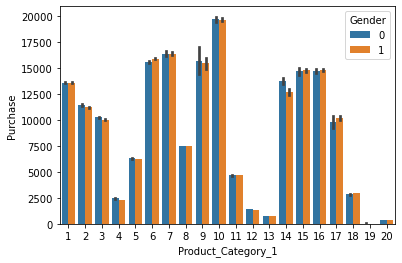

In [33]:
## Visualisation of Purchase with Product_Category_1

sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\meenata\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

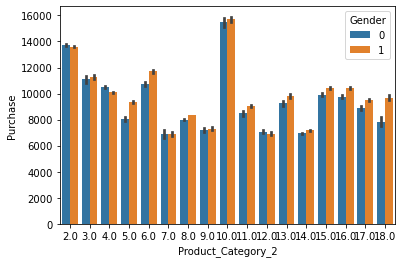

In [34]:
## Visualisation of Purchase with Product_Category_2


sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\meenata\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

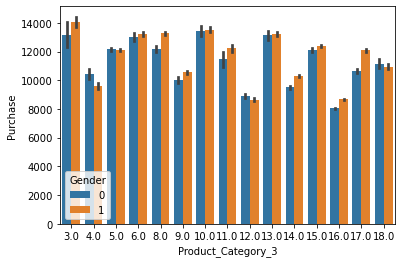

In [35]:
## Visualisation of Purchase with Product_Category_3

sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

## Observation

Comparing all three product categories, Product_Category_1 seems to have the highest purchase

### Feature Scaling and preparing the dataset for model training

In [36]:
# Feature Scaling

df_test = df[df['Purchase'].isnull()]
df_train = df[~(df['Purchase'].isnull())]

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X = df_train.loc[:, df_train.columns != 'Purchase']
y = df_train['Purchase']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)